1. 엑셀데이터를 pandas를 이용하여 로딩하시오
2. 각 열의 기술 통계치를 출력하시오.(boxplot로 이상치 확인)
3. P는 points로, G는 goals로, A는 assists로, S%는 shooting_percentage로,
Shift/GP는 shifts_per_game_played로 열이름을 변경
4. G / A / P열의 상관관계를 확인하시오.
5. S%열의 분포도를 그리고 이미지로 출력하시오
6. 각 데이터 간의 정의 상관관계가 있는지 확인하시오
7. 각 열 중 ['player', 'points', 'goals', 'assists']열만 출력하는 함수를 작성하시오
8. 75 < points <= 80인 사람만 출력하는 함수를 작성하고 실행하시오
9. goals > 40이고, points < 80인 선수를 출력하는 함수를 작성하고 실행하시오
10. assists와 goal간의 상관관계를 확인하고 회귀식을 작성하고 predict해보시오
11. points와 goals, assists간의 ANOVA분석을 실시하시오

In [1]:
!head playerstats-2013-2014-top30.csv

# 2013-2014 / Regular Season / All Skaters / Summary / Points
Rank,Player,Team,Pos,GP,G,A,P,+/-,PIM,PPG,PPP,SHG,SHP,GW,OT,S,S%,TOI/GP,Shift/GP,FO%
1,Sidney Crosby,PIT,C,80,36,68,104,+18,46,11,38,0,0,5,1,259,13.9,21:58,24.0,52.5
2,Ryan Getzlaf,ANA,C,77,31,56,87,+28,31,5,23,0,0,7,1,204,15.2,21:17,25.2,49.0
3,Claude Giroux,PHI,C,82,28,58,86,+7,46,7,37,0,0,7,1,223,12.6,20:26,25.1,52.9
4,Tyler Seguin,DAL,C,80,37,47,84,+16,18,11,25,0,0,8,0,294,12.6,19:20,23.4,41.5
5,Corey Perry,ANA,R,81,43,39,82,+32,65,8,18,0,0,9,1,280,15.4,19:28,23.2,36.0
6,Phil Kessel,TOR,R,82,37,43,80,-5,27,8,20,0,0,6,0,305,12.1,20:39,24.5,14.3
7,Taylor Hall,EDM,L,75,27,53,80,-15,44,7,17,0,1,1,1,250,10.8,20:00,25.4,45.7
8,Alex Ovechkin,WSH,L,78,51,28,79,-35,48,24,39,0,1,10,3,386,13.2,20:32,21.8,66.7


In [1]:
a = open('playerstats-2013-2014-top30.csv')
pstats = a.readlines()[1:]
'''aa = [x.strip() for x in pstats.split(',')]
aa'''
type(pstats)
pstats[:3]

['Rank,Player,Team,Pos,GP,G,A,P,+/-,PIM,PPG,PPP,SHG,SHP,GW,OT,S,S%,TOI/GP,Shift/GP,FO%\n',
 '1,Sidney Crosby,PIT,C,80,36,68,104,+18,46,11,38,0,0,5,1,259,13.9,21:58,24.0,52.5\n',
 '2,Ryan Getzlaf,ANA,C,77,31,56,87,+28,31,5,23,0,0,7,1,204,15.2,21:17,25.2,49.0\n']

In [19]:
import csv

In [31]:
rows = []
with open('playerstats-2013-2014-top30.csv') as f:
    csvreader = csv.reader(f)
    for fields in csvreader:
        rows.append(fields)

In [44]:
print rows[1]
print rows[2]
print rows[3]

['Rank', 'Player', 'Team', 'Pos', 'GP', 'G', 'A', 'P', '+/-', 'PIM', 'PPG', 'PPP', 'SHG', 'SHP', 'GW', 'OT', 'S', 'S%', 'TOI/GP', 'Shift/GP', 'FO%']
['1', 'Sidney Crosby', 'PIT', 'C', '80', '36', '68', '104', '+18', '46', '11', '38', '0', '0', '5', '1', '259', '13.9', '21:58', '24.0', '52.5']
['2', 'Ryan Getzlaf', 'ANA', 'C', '77', '31', '56', '87', '+28', '31', '5', '23', '0', '0', '7', '1', '204', '15.2', '21:17', '25.2', '49.0']


## 1. 엑셀데이터를 pandas를 이용하여 로딩하시오

In [11]:
import pandas as pd
import numpy as np

In [5]:
# header=1 진짜 데이터는 1행부터라는 뜻(0행은 무시하고 넘어감)
pstats = pd.read_csv('playerstats-2013-2014-top30.csv', header=1)
pstats.head()

,Rank,Player,Team,Pos,GP,G,A,P,+/-,PIM,...,PPP,SHG,SHP,GW,OT,S,S%,TOI/GP,Shift/GP,FO%
0,1,Sidney Crosby,PIT,C,80,36,68,104,18,46,...,38,0,0,5,1,259,13.9,21:58,24.0,52.5
1,2,Ryan Getzlaf,ANA,C,77,31,56,87,28,31,...,23,0,0,7,1,204,15.2,21:17,25.2,49.0
2,3,Claude Giroux,PHI,C,82,28,58,86,7,46,...,37,0,0,7,1,223,12.6,20:26,25.1,52.9
3,4,Tyler Seguin,DAL,C,80,37,47,84,16,18,...,25,0,0,8,0,294,12.6,19:20,23.4,41.5
4,5,Corey Perry,ANA,R,81,43,39,82,32,65,...,18,0,0,9,1,280,15.4,19:28,23.2,36.0


In [6]:
pstats.describe()

,Rank,GP,G,A,P,+/-,PIM,PPG,PPP,SHG,SHP,GW,OT,S,S%,Shift/GP,FO%
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000
mean,15.500000,77.733333,29.266667,45.466667,74.733333,7.500000,39.200000,8.266667,23.900000,0.333333,0.633333,5.000000,0.700000,233.566667,12.523333,24.060000,45.92000
std,8.803408,6.169633,8.106759,9.235364,8.501251,18.554208,15.968503,4.217642,7.567398,0.711159,1.159171,2.363516,0.749713,51.470570,2.271819,1.920955,16.19656
min,1.000000,59.000000,11.000000,28.000000,65.000000,-35.000000,10.000000,2.000000,15.000000,0.000000,0.000000,1.000000,0.000000,122.000000,7.800000,21.300000,0.00000
25%,8.250000,76.250000,24.000000,40.000000,69.000000,-5.750000,27.250000,5.000000,19.000000,0.000000,0.000000,3.250000,0.000000,200.000000,10.900000,22.400000,42.00000
50%,15.500000,80.000000,28.000000,43.000000,71.000000,9.000000,40.000000,8.000000,22.000000,0.000000,0.000000,5.000000,1.000000,224.000000,12.500000,23.900000,50.15000
75%,22.750000,82.000000,34.000000,49.750000,79.000000,20.750000,47.500000,10.000000,25.000000,0.000000,1.000000,6.000000,1.000000,258.500000,13.975000,25.400000,53.20000
max,30.000000,82.000000,51.000000,68.000000,104.000000,39.000000,66.000000,24.000000,44.000000,3.000000,5.000000,10.000000,3.000000,386.000000,18.200000,28.600000,75.00000


## 2. 각 열의 기술 통계치를 출력하시오.(boxplot로 이상치 확인)

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:8: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.


{'boxes': [<matplotlib.lines.Line2D at 0x7f1208a41e10>,
 'caps': [<matplotlib.lines.Line2D at 0x7f12089d9bd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f12089eded0>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f12089ed890>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f1208a41f10>,
  <matplotlib.lines.Line2D at 0x7f12087ed9d0>]}

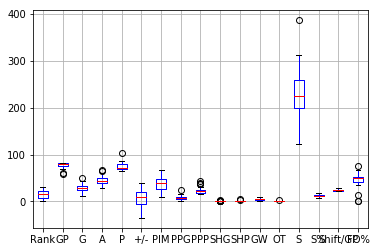

In [8]:
'''fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1)
ax.box(pstats)
'''
#plt.boxplot([pstats['GP'], pstats['G']], )
#plt.boxplot(pstats, 1)
fig, ax = plt.subplots(1, 1)
pstats.boxplot(ax = ax)

## 3. P는 points로, G는 goals로, A는 assists로, S%는 shooting_percentage로, Shift/GP는 shifts_per_game_played로 열이름을 변경

In [9]:
pstats = pstats.rename(columns={'P':'points', 'G':'goals', 'A':'assists',
                               'S%':'shooting_percentage', 'Shift/GP':'shifts_per_game_played'})

## 4. G / A / P열의 상관관계를 확인하시오.

In [12]:
#pstats.corrwith(pstats['points'])
# list로 만들어야 한다
np.corrcoef([pstats['points'], pstats['assists'], pstats['goals']])

array([[ 1.        ,  0.58490107,  0.38233236],
       [ 0.58490107,  1.        , -0.52585426],
       [ 0.38233236, -0.52585426,  1.        ]])

## 5. S%열의 분포도를 그리고 이미지로 출력하시오

In [14]:
import scipy.stats

In [15]:
print pstats.shooting_percentage.describe()
print scipy.stats.normaltest(pstats.shooting_percentage)

count    30.000000
mean     12.523333
std       2.271819
min       7.800000
25%      10.900000
50%      12.500000
75%      13.975000
max      18.200000
Name: shooting_percentage, dtype: float64
NormaltestResult(statistic=0.61491090232071888, pvalue=0.73531562427598918)


In [16]:
np.histogram(pstats.shooting_percentage)

# y축(빈도수): array([1, 2, 6, 2, 8, 4, 3, 3, 0, 1]),
# x축(관찰값): array([  7.8 ,   8.84,   9.88,  10.92,  11.96,  
#                   13.  ,  14.04,  15.08, 16.12,  17.16,  18.2 ])

(array([1, 2, 6, 2, 8, 4, 3, 3, 0, 1]),
 array([  7.8 ,   8.84,   9.88,  10.92,  11.96,  13.  ,  14.04,  15.08,
         16.12,  17.16,  18.2 ]))

(array([ 1.,  2.,  6.,  2.,  8.,  4.,  3.,  3.,  0.,  1.]),
 array([  7.8 ,   8.84,   9.88,  10.92,  11.96,  13.  ,  14.04,  15.08,
         16.12,  17.16,  18.2 ]),
 <a list of 10 Patch objects>)

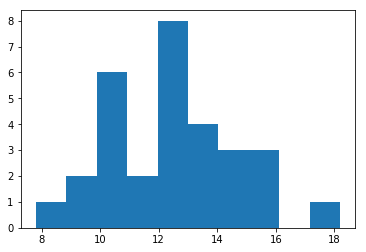

In [17]:
plt.hist(pstats.shooting_percentage)

In [18]:
step = np.linspace(7.8, 18.2, 30)
step = step - step[14]

In [19]:
print pd.qcut(pstats.shooting_percentage, 30)

0      (13.83, 13.927]
1      (14.767, 15.22]
2         (12.5, 12.6]
3         (12.5, 12.6]
4      (15.22, 15.447]
5      (12.06, 12.157]
6      (10.76, 10.877]
7       (12.947, 13.4]
8        (16.17, 18.2]
9     (12.157, 12.307]
10      (9.187, 10.19]
11      (10.877, 10.9]
12       (8.96, 9.187]
13         [7.8, 8.96]
14     (11.853, 12.06]
15    (11.467, 11.853]
16      (14.117, 14.5]
17     (10.567, 10.76]
18    (14.533, 14.767]
19      (12.687, 12.8]
20      (12.307, 12.5]
21       (13.4, 13.83]
22     (11.11, 11.467]
23     (15.447, 16.17]
24      (14.117, 14.5]
25      (10.877, 10.9]
26    (10.387, 10.567]
27      (12.687, 12.8]
28     (10.19, 10.387]
29    (13.927, 14.117]
Name: shooting_percentage, dtype: category
Categories (30, object): [[7.8, 8.96] < (8.96, 9.187] < (9.187, 10.19] < (10.19, 10.387] ... (14.767, 15.22] < (15.22, 15.447] < (15.447, 16.17] < (16.17, 18.2]]


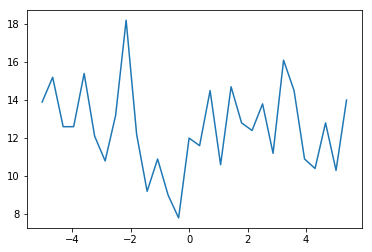

In [20]:
plt.plot(step, pstats.shooting_percentage)

## 6. 각 데이터 간의 정의 상관관계가 있는지 확인하시오

In [21]:
pstats.describe()

,Rank,GP,goals,assists,points,+/-,PIM,PPG,PPP,SHG,SHP,GW,OT,S,shooting_percentage,shifts_per_game_played,FO%
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000
mean,15.500000,77.733333,29.266667,45.466667,74.733333,7.500000,39.200000,8.266667,23.900000,0.333333,0.633333,5.000000,0.700000,233.566667,12.523333,24.060000,45.92000
std,8.803408,6.169633,8.106759,9.235364,8.501251,18.554208,15.968503,4.217642,7.567398,0.711159,1.159171,2.363516,0.749713,51.470570,2.271819,1.920955,16.19656
min,1.000000,59.000000,11.000000,28.000000,65.000000,-35.000000,10.000000,2.000000,15.000000,0.000000,0.000000,1.000000,0.000000,122.000000,7.800000,21.300000,0.00000
25%,8.250000,76.250000,24.000000,40.000000,69.000000,-5.750000,27.250000,5.000000,19.000000,0.000000,0.000000,3.250000,0.000000,200.000000,10.900000,22.400000,42.00000
50%,15.500000,80.000000,28.000000,43.000000,71.000000,9.000000,40.000000,8.000000,22.000000,0.000000,0.000000,5.000000,1.000000,224.000000,12.500000,23.900000,50.15000
75%,22.750000,82.000000,34.000000,49.750000,79.000000,20.750000,47.500000,10.000000,25.000000,0.000000,1.000000,6.000000,1.000000,258.500000,13.975000,25.400000,53.20000
max,30.000000,82.000000,51.000000,68.000000,104.000000,39.000000,66.000000,24.000000,44.000000,3.000000,5.000000,10.000000,3.000000,386.000000,18.200000,28.600000,75.00000


## 6. 각 데이터 간의 정의 상관관계가 있는지 확인하시오(+ 인것만 출력)

In [202]:
#pstats[[]]
#pstats.ix[:, [1:3]]

# 0번째 열을 제외하고 모든 데이터를 출력하고 싶을 때. ix는 아래처럼 사용을 못함
pstats.iloc[:, 1:]

,Player,Team,Pos,GP,goals,assists,points,+/-,PIM,PPG,PPP,SHG,SHP,GW,OT,S,shooting_percentage,TOI/GP,shifts_per_game_played,FO%
0,Sidney Crosby,PIT,C,80,36,68,104,18,46,11,38,0,0,5,1,259,13.9,21:58,24.0,52.5
1,Ryan Getzlaf,ANA,C,77,31,56,87,28,31,5,23,0,0,7,1,204,15.2,21:17,25.2,49.0
2,Claude Giroux,PHI,C,82,28,58,86,7,46,7,37,0,0,7,1,223,12.6,20:26,25.1,52.9
3,Tyler Seguin,DAL,C,80,37,47,84,16,18,11,25,0,0,8,0,294,12.6,19:20,23.4,41.5
4,Corey Perry,ANA,R,81,43,39,82,32,65,8,18,0,0,9,1,280,15.4,19:28,23.2,36.0
5,Phil Kessel,TOR,R,82,37,43,80,-5,27,8,20,0,0,6,0,305,12.1,20:39,24.5,14.3
6,Taylor Hall,EDM,L,75,27,53,80,-15,44,7,17,0,1,1,1,250,10.8,20:00,25.4,45.7
7,Alex Ovechkin,WSH,L,78,51,28,79,-35,48,24,39,0,1,10,3,386,13.2,20:32,21.8,66.7
8,Joe Pavelski,SJS,C,82,41,38,79,23,32,16,31,1,2,3,0,225,18.2,19:51,27.1,56.0
9,Jamie Benn,DAL,L,81,34,45,79,21,64,5,19,1,3,3,1,279,12.2,19:09,25.0,52.8


In [22]:
numeric_pstats = pstats[pstats.describe().columns]
numeric_pstats.head()
numeric_pstats.corr()

,Rank,GP,goals,assists,points,+/-,PIM,PPG,PPP,SHG,SHP,GW,OT,S,shooting_percentage,shifts_per_game_played,FO%
Rank,1.000000,-0.307282,-0.429542,-0.450424,-0.898929,-0.111149,-0.062795,-0.203388,-0.463522,0.170744,0.059135,-0.120981,-0.175025,-0.425825,-0.113881,-0.236941,-0.040944
GP,-0.307282,1.000000,0.199340,0.090616,0.288531,0.184052,-0.108643,0.062460,0.067358,0.162423,0.159436,0.085131,0.257943,0.258824,-0.018238,0.470707,-0.198055
goals,-0.429542,0.199340,1.000000,-0.525854,0.382332,0.024759,0.098398,0.782478,0.178633,0.049843,0.106171,0.532706,0.268929,0.777278,0.635492,-0.049335,0.191147
assists,-0.450424,0.090616,-0.525854,1.000000,0.584901,0.097599,0.036757,-0.530044,0.318935,-0.213511,-0.183172,-0.383880,-0.103590,-0.359731,-0.435247,0.180493,-0.103318
points,-0.898929,0.288531,0.382332,0.584901,1.000000,0.129638,0.133763,0.170353,0.516820,-0.184418,-0.097745,0.090957,0.143915,0.350414,0.133170,0.149033,0.070037
+/-,-0.111149,0.184052,0.024759,0.097599,0.129638,1.000000,-0.066805,-0.266591,-0.323812,0.075786,0.098602,0.305093,-0.016113,-0.316791,0.422079,0.011416,0.132004
PIM,-0.062795,-0.108643,0.098398,0.036757,0.133763,-0.066805,1.000000,0.031437,0.140282,-0.230773,-0.124442,-0.080401,0.100236,0.106380,-0.006216,-0.355296,0.118778
PPG,-0.203388,0.062460,0.782478,-0.530044,0.170353,-0.266591,0.031437,1.000000,0.460035,-0.030657,0.006583,0.415102,0.255184,0.644508,0.437303,-0.100360,0.365840
PPP,-0.463522,0.067358,0.178633,0.318935,0.516820,-0.323812,0.140282,0.460035,1.000000,-0.083298,-0.130118,-0.034703,0.024920,0.243788,-0.041379,0.034111,0.175770
SHG,0.170744,0.162423,0.049843,-0.213511,-0.184418,0.075786,-0.230773,-0.030657,-0.083298,1.000000,0.906316,-0.225668,-0.258702,-0.077877,0.208453,0.459398,0.168248


In [23]:
numeric_pstats.corr()[numeric_pstats.corr() > 0]

,Rank,GP,goals,assists,points,+/-,PIM,PPG,PPP,SHG,SHP,GW,OT,S,shooting_percentage,shifts_per_game_played,FO%
Rank,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.170744,0.059135,NaN,NaN,NaN,NaN,NaN,NaN
GP,NaN,1.000000,0.199340,0.090616,0.288531,0.184052,NaN,0.062460,0.067358,0.162423,0.159436,0.085131,0.257943,0.258824,NaN,0.470707,NaN
goals,NaN,0.199340,1.000000,NaN,0.382332,0.024759,0.098398,0.782478,0.178633,0.049843,0.106171,0.532706,0.268929,0.777278,0.635492,NaN,0.191147
assists,NaN,0.090616,NaN,1.000000,0.584901,0.097599,0.036757,NaN,0.318935,NaN,NaN,NaN,NaN,NaN,NaN,0.180493,NaN
points,NaN,0.288531,0.382332,0.584901,1.000000,0.129638,0.133763,0.170353,0.516820,NaN,NaN,0.090957,0.143915,0.350414,0.133170,0.149033,0.070037
+/-,NaN,0.184052,0.024759,0.097599,0.129638,1.000000,NaN,NaN,NaN,0.075786,0.098602,0.305093,NaN,NaN,0.422079,0.011416,0.132004
PIM,NaN,NaN,0.098398,0.036757,0.133763,NaN,1.000000,0.031437,0.140282,NaN,NaN,NaN,0.100236,0.106380,NaN,NaN,0.118778
PPG,NaN,0.062460,0.782478,NaN,0.170353,NaN,0.031437,1.000000,0.460035,NaN,0.006583,0.415102,0.255184,0.644508,0.437303,NaN,0.365840
PPP,NaN,0.067358,0.178633,0.318935,0.516820,NaN,0.140282,0.460035,1.000000,NaN,NaN,NaN,0.024920,0.243788,NaN,0.034111,0.175770
SHG,0.170744,0.162423,0.049843,NaN,NaN,0.075786,NaN,NaN,NaN,1.000000,0.906316,NaN,NaN,NaN,0.208453,0.459398,0.168248


In [369]:
numeric_pstats.columns = range(17)
a = []
for x in range(17):
    for y in range(17):
        if numeric_pstats[x].corr(numeric_pstats[y]) > 0:
            if x == y:
                continue
            a.append([numeric_pstats[x].corr(numeric_pstats[y]), x, y])
dfa = pd.DataFrame(a)            

In [375]:
numer_var_corr = dfa.groupby([dfa[1], dfa[2]], group_keys=False).sum().unstack().fillna(0.00001)

In [378]:
numer_var_corr = numer_var_corr.rename(index={0:'Rank', 1:'GP', 2:'goals', 3:'assists', 4:'points', 
                               5:'+/-', 6:'PIM', 7:'PPG', 8:'PPP', 9:'SHG', 10:'SHP', 
                               11:'GW', 12:'OT', 13:'S', 14:'shooting_percentage',
                               15:'shifts_per_game_played', 16:'FO%'})
numer_var_corr = numer_var_corr.rename(columns={0:'Rank', 1:'GP', 2:'goals', 3:'assists', 4:'points', 
                               5:'+/-', 6:'PIM', 7:'PPG', 8:'PPP', 9:'SHG', 10:'SHP', 
                               11:'GW', 12:'OT', 13:'S', 14:'shooting_percentage',
                               15:'shifts_per_game_played', 16:'FO%'})

In [379]:
numer_var_corr

Rank                                          \
2                           Rank        GP     goals   assists    points   
1                                                                          
Rank                    0.000010  0.000010  0.000010  0.000010  0.000010   
GP                      0.000010  0.000010  0.199340  0.090616  0.288531   
goals                   0.000010  0.199340  0.000010  0.000010  0.382332   
assists                 0.000010  0.090616  0.000010  0.000010  0.584901   
points                  0.000010  0.288531  0.382332  0.584901  0.000010   
+/-                     0.000010  0.184052  0.024759  0.097599  0.129638   
PIM                     0.000010  0.000010  0.098398  0.036757  0.133763   
PPG                     0.000010  0.062460  0.782478  0.000010  0.170353   
PPP                     0.000010  0.067358  0.178633  0.318935  0.516820   
SHG                     0.170744  0.162423  0.049843  0.000010  0.000010   
SHP                     0.059135  0.159436  0.106171  0.000010  0.000010   
GW                      0.000010  0.085131  0.532706  0.000010  0.090957   
OT                      0.000010  0.257943  0.268929  0.000010  0.143915   
S                       0.000010  0.258824  0.777278  0.000010  0.350414   
shooting_percentage     0.000010  0.000010  0.635492  0.000010  0.133170   
shifts_per_game_played  0.000010  0.470707  0.000010  0.180493  0.149033   
FO%                     0.000010  0.000010  0.191147  0.000010  0.070037   

                                                                          \
2                            +/-       PIM       PPG       PPP       SHG   
1                                                                          
Rank                    0.000010  0.000010  0.000010  0.000010  0.170744   
GP                      0.184052  0.000010  0.062460  0.067358  0.162423   
goals                   0.024759  0.098398  0.782478  0.178633  0.049843   
assists                 0.097599  0.036757  0.000010  0.318935  0.000010   
points                  0.129638  0.133763  0.170353  0.516820  0.000010   
+/-                     0.000010  0.000010  0.000010  0.000010  0.075786   
PIM                     0.000010  0.000010  0.031437  0.140282  0.000010   
PPG                     0.000010  0.031437  0.000010  0.460035  0.000010   
PPP                     0.000010  0.140282  0.460035  0.000010  0.000010   
SHG                     0.075786  0.000010  0.000010  0.000010  0.000010   
SHP                     0.098602  0.000010  0.006583  0.000010  0.906316   
GW                      0.305093  0.000010  0.415102  0.000010  0.000010   
OT                      0.000010  0.100236  0.255184  0.024920  0.000010   
S                       0.000010  0.106380  0.644508  0.243788  0.000010   
shooting_percentage     0.422079  0.000010  0.437303  0.000010  0.208453   
shifts_per_game_played  0.011416  0.000010  0.000010  0.034111  0.459398   
FO%                     0.132004  0.118778  0.365840  0.175770  0.168248   

                                                                \
2                            SHP        GW        OT         S   
1                                                                
Rank                    0.059135  0.000010  0.000010  0.000010   
GP                      0.159436  0.085131  0.257943  0.258824   
goals                   0.106171  0.532706  0.268929  0.777278   
assists                 0.000010  0.000010  0.000010  0.000010   
points                  0.000010  0.090957  0.143915  0.350414   
+/-                     0.098602  0.305093  0.000010  0.000010   
PIM                     0.000010  0.000010  0.100236  0.106380   
PPG                     0.006583  0.415102  0.255184  0.644508   
PPP                     0.000010  0.000010  0.024920  0.243788   
SHG                     0.906316  0.000010  0.000010  0.000010   
SHP                     0.000010  0.000010  0.000010  0.000010   
GW                      0.000010  0.000010  0.389205  0.276652

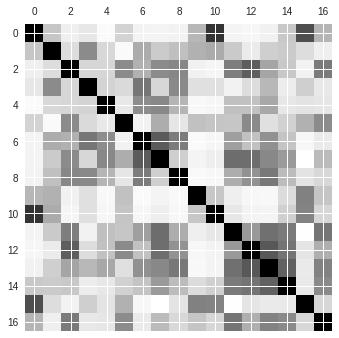

In [373]:
plt.matshow(numer_var_corr.corr())

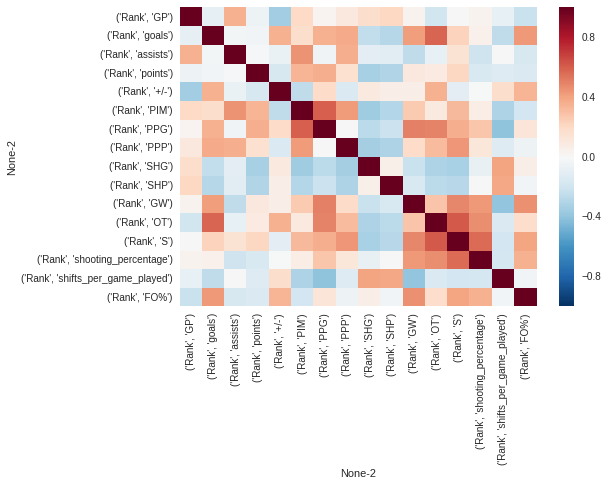

In [380]:
import seaborn as sns
corr = numer_var_corr.iloc[:, 1:].corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

## 7. 각 열 중 ['player', 'points', 'goals', 'assists']열만 출력하는 함수를 작성하시오

In [381]:
pstats[['Player', 'points', 'goals', 'assists']].head()

,Player,points,goals,assists
0,Sidney Crosby,104,36,68
1,Ryan Getzlaf,87,31,56
2,Claude Giroux,86,28,58
3,Tyler Seguin,84,37,47
4,Corey Perry,82,43,39


## 9. goals > 40이고, points < 80인 선수를 출력하는 함수를 작성하고 실행하시오

In [395]:
print pstats[pstats['goals']>40]
pstats[pstats['points']<80]
# and pstats[['points' < 80]]

   Rank         Player Team Pos  GP  goals  assists  points  +/-  PIM  ...   \
4     5    Corey Perry  ANA   R  81     43       39      82   32   65  ...    
7     8  Alex Ovechkin  WSH   L  78     51       28      79  -35   48  ...    
8     9   Joe Pavelski  SJS   C  82     41       38      79   23   32  ...    

   PPP  SHG  SHP  GW  OT    S  shooting_percentage  TOI/GP  \
4   18    0    0   9   1  280                 15.4   19:28   
7   39    0    1  10   3  386                 13.2   20:32   
8   31    1    2   3   0  225                 18.2   19:51   

  shifts_per_game_played   FO%  
4                   23.2  36.0  
7                   21.8  66.7  
8                   27.1  56.0  

[3 rows x 21 columns]


,Rank,Player,Team,Pos,GP,goals,assists,points,+/-,PIM,...,PPP,SHG,SHP,GW,OT,S,shooting_percentage,TOI/GP,shifts_per_game_played,FO%
7,8,Alex Ovechkin,WSH,L,78,51,28,79,-35,48,...,39,0,1,10,3,386,13.2,20:32,21.8,66.7
8,9,Joe Pavelski,SJS,C,82,41,38,79,23,32,...,31,1,2,3,0,225,18.2,19:51,27.1,56.0
9,10,Jamie Benn,DAL,L,81,34,45,79,21,64,...,19,1,3,3,1,279,12.2,19:09,25.0,52.8
10,11,Nicklas Backstrom,WSH,C,82,18,61,79,-20,54,...,44,1,1,1,0,196,9.2,19:48,23.3,50.4
11,12,Patrick Sharp,CHI,L,82,34,44,78,13,40,...,25,0,0,3,1,313,10.9,18:53,22.7,54.6
12,13,Joe Thornton,SJS,C,82,11,65,76,20,32,...,19,0,1,3,1,122,9.0,18:55,26.3,56.1
13,14,Erik Karlsson,OTT,D,82,20,54,74,-15,36,...,31,0,0,1,0,257,7.8,27:04,28.6,0.0
14,15,Evgeni Malkin,PIT,C,60,23,49,72,10,62,...,30,0,0,3,0,191,12.0,20:03,21.4,48.8
15,16,Patrick Marleau,SJS,L,82,33,37,70,0,18,...,23,2,2,4,0,285,11.6,20:31,27.3,52.9
16,17,Anze Kopitar,LAK,C,82,29,41,70,34,24,...,23,0,0,9,2,200,14.5,20:53,25.4,53.3


In [413]:
np.where((pstats.iloc[:, 'goals']>40) & (pstats.iloc[:, 'points']<80))

ValueError: Location based indexing can only have [integer, integer slice (START point is INCLUDED, END point is EXCLUDED), listlike of integers, boolean array] types

In [419]:
for a in pstats.where(('goals'>40) & ('points'<80)):
    print pstats(a)

ValueError: where requires an ndarray like object for its condition

In [420]:
pstats[(pstats['goals']>40) & (pstats['points']<80)]

,Rank,Player,Team,Pos,GP,goals,assists,points,+/-,PIM,...,PPP,SHG,SHP,GW,OT,S,shooting_percentage,TOI/GP,shifts_per_game_played,FO%
7,8,Alex Ovechkin,WSH,L,78,51,28,79,-35,48,...,39,0,1,10,3,386,13.2,20:32,21.8,66.7
8,9,Joe Pavelski,SJS,C,82,41,38,79,23,32,...,31,1,2,3,0,225,18.2,19:51,27.1,56.0


## 10. assists와 goal간의 상관관계를 확인하고 회귀식을 작성하고 predict해보시오

In [425]:
np.corrcoef([pstats['assists'], pstats['goals']])

array([[ 1.        , -0.52585426],
       [-0.52585426,  1.        ]])

In [427]:
import statsmodels.formula.api as smf

In [428]:
# Fit regression model (using the natural log of one of the regressors)
results = smf.ols('assists ~ goals', data=pstats).fit()
# Inspect the results
print results.summary()

                            OLS Regression Results                            
Dep. Variable:                assists   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.251
Method:                 Least Squares   F-statistic:                     10.70
Date:                Fri, 03 Mar 2017   Prob (F-statistic):            0.00284
Time:                        18:18:12   Log-Likelihood:                -103.90
No. Observations:                  30   AIC:                             211.8
Df Residuals:                      28   BIC:                             214.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     62.9992      5.555     11.342      0.0

In [429]:
# Fit regression model (using the natural log of one of the regressors)
results = smf.ols('goals ~ assists', data=pstats).fit()
# Inspect the results
print results.summary()

                            OLS Regression Results                            
Dep. Variable:                  goals   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.251
Method:                 Least Squares   F-statistic:                     10.70
Date:                Fri, 03 Mar 2017   Prob (F-statistic):            0.00284
Time:                        18:18:26   Log-Likelihood:                -99.985
No. Observations:                  30   AIC:                             204.0
Df Residuals:                      28   BIC:                             206.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     50.2537      6.542      7.682      0.0

## 11. points와 goals, assists간의 ANOVA분석을 실시하시오

In [438]:
# 연속형변수로 무슨 분산분석을.....

In [439]:
pstats[:1]

,Rank,Player,Team,Pos,GP,goals,assists,points,+/-,PIM,...,PPP,SHG,SHP,GW,OT,S,shooting_percentage,TOI/GP,shifts_per_game_played,FO%
0,1,Sidney Crosby,PIT,C,80,36,68,104,18,46,...,38,0,0,5,1,259,13.9,21:58,24,52.5


In [447]:
pd.DataFrame(pstats.groupby('Pos')['points'].sum()).T

Pos,C,D,L,R
points,1076,74,522,570


In [453]:
pd.DataFrame(pstats.pivot_table('points', index='Pos', aggfunc=sum)).T

Pos,C,D,L,R
points,1076,74,522,570


In [ ]:
# h0: goal수와 assist수에 따라 point가 차이가 없다

In [437]:
print np.mean(pstats['points'])
print np.mean(pstats['goals'])
print np.mean(pstats['assists'])

74.7333333333
29.2666666667
45.4666666667


In [433]:
#comparing variances
print(scipy.stats.levene(pstats['points'], pstats['goals'], pstats['assists'])), '\n'

#comparing means - one way anova - parametric
print(scipy.stats.f_oneway(pstats['points'], pstats['goals'], pstats['assists'])), '\n'
#Kruskal-Wallis test – one way anova on ranks – non-parametric
print(scipy.stats.kruskal(pstats['points'], pstats['goals'], pstats['assists']))

LeveneResult(statistic=0.1320028011204481, pvalue=0.87651372048855025) 

F_onewayResult(statistic=214.04668066880816, pvalue=2.5237628911030242e-34) 

KruskalResult(statistic=72.911115413769224, pvalue=1.4707960443992381e-16)
